In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo Excel
data = pd.ExcelFile("OCyT_Data.xlsx")
all_sheets = pd.read_excel(data, sheet_name=None)

# Ver nombres de todas las hojas
print(data.sheet_names)



['Grafica 1', 'Grafica 2', 'Grafica 3', 'Grafico 4', 'Grafica 5', 'Grafica 6', 'Grafica 7', 'Grafica 8', 'Grafica 9', 'Grafica 10', 'Grafica 11', '%PIB ACTI']


In [14]:
def analyze_sheet(sheet_name, all_sheets):
    print("="*60)
    print(f"📊 Analizando hoja: {sheet_name}")
    print("="*60)

    # Copiar y limpiar columnas
    df = all_sheets[sheet_name].copy()
    df.columns = df.columns.str.strip()  # quitar espacios en nombres de columnas
    
    # Eliminar filas duplicadas
    df = df.drop_duplicates()
    
    # Manejar valores nulos
    df = df.dropna(how="all")  # eliminar filas completamente vacías
    
    # Intentar convertir columnas a numéricas donde sea posible
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="ignore")

    # Detectar columnas numéricas y categóricas
    numeric_cols = df.select_dtypes(include="number").columns.tolist()
    categorical_cols = df.select_dtypes(exclude="number").columns.tolist()

    print(f"🔢 Columnas numéricas: {numeric_cols}")
    print(f"🔠 Columnas categóricas: {categorical_cols}")

    # --- Si hay columnas numéricas ---
    if len(numeric_cols) > 0:
        print("\n📈 Análisis numérico:")
        print(df[numeric_cols].describe())

        # Histogramas
        df[numeric_cols].hist(bins=20, figsize=(15,10))
        plt.suptitle(f"Histogramas - {sheet_name}", fontsize=16)
        plt.show()

        # Correlaciones
        if len(numeric_cols) > 1:
            plt.figure(figsize=(10,6))
            sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
            plt.title(f"Matriz de correlación - {sheet_name}")
            plt.show()

    # --- Si hay columnas categóricas ---
    if len(categorical_cols) > 0:
        print("\n🔠 Análisis categórico:")

        for col in categorical_cols:
            print(f"\nFrecuencia de valores en {col}:")
            print(df[col].value_counts())

            # Gráfico de barras
            plt.figure(figsize=(8,5))
            df[col].value_counts().plot(kind="bar")
            plt.title(f"Distribución de {col} - {sheet_name}")
            plt.ylabel("Frecuencia")
            plt.show()




📊 Analizando hoja: Grafica 9
🔢 Columnas numéricas: []
🔠 Columnas categóricas: ['Grafica 9. Proporción de la inversión en I+D frente a las otras ACTI', 'Unnamed: 1', 'Unnamed: 2']

🔠 Análisis categórico:

Frecuencia de valores en Grafica 9. Proporción de la inversión en I+D frente a las otras ACTI:
Grafica 9. Proporción de la inversión en I+D frente a las otras ACTI
Actividad     1
I+D           1
Otras ACTI    1
Total         1
Name: count, dtype: int64


/tmp/ipykernel_34164/762843013.py:18: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


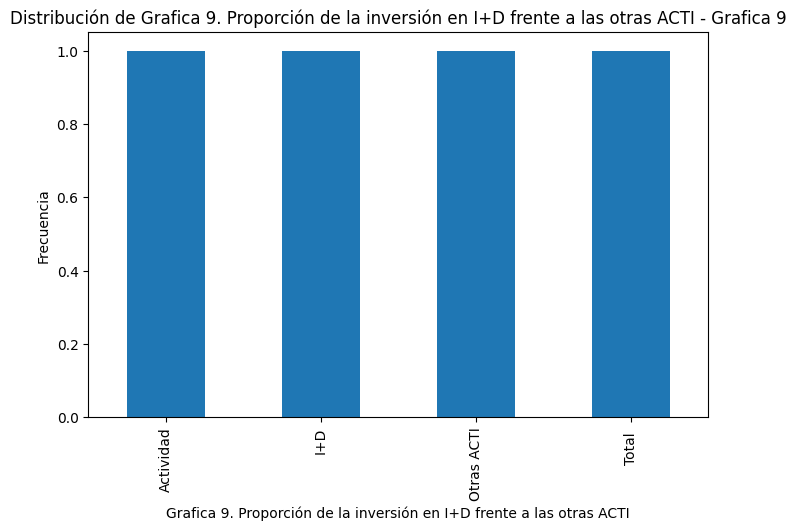


Frecuencia de valores en Unnamed: 1:
Unnamed: 1
2022+       1
0.232324    1
0.767676    1
1           1
Name: count, dtype: int64


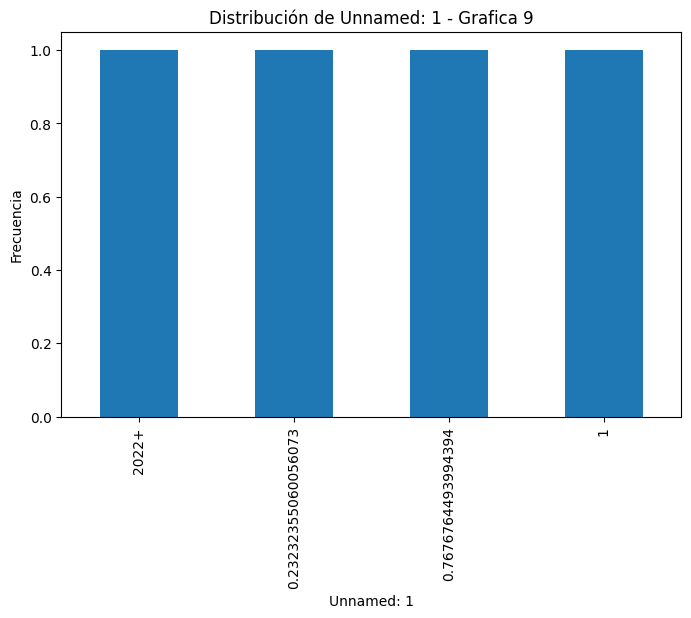


Frecuencia de valores en Unnamed: 2:
Unnamed: 2
2023+       1
0.300817    1
0.699183    1
1           1
Name: count, dtype: int64


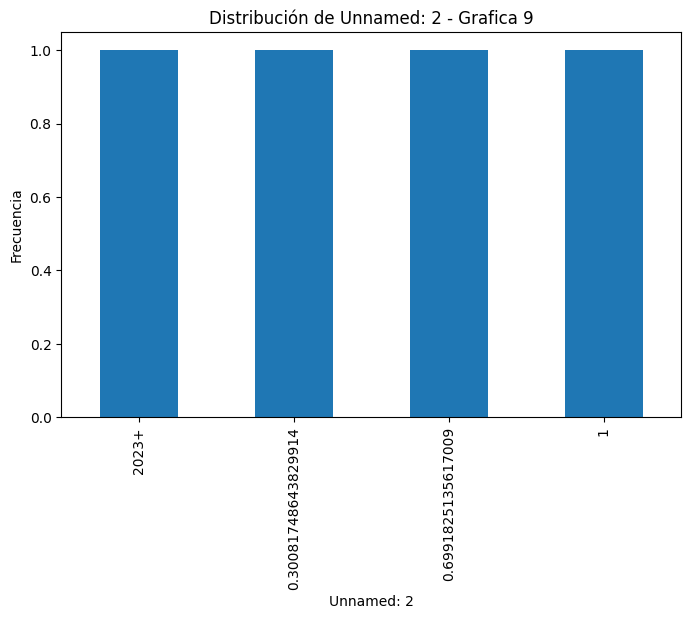

In [ ]:
# Analizar grafica requerida
analyze_sheet("Grafica 9", all_sheets)
